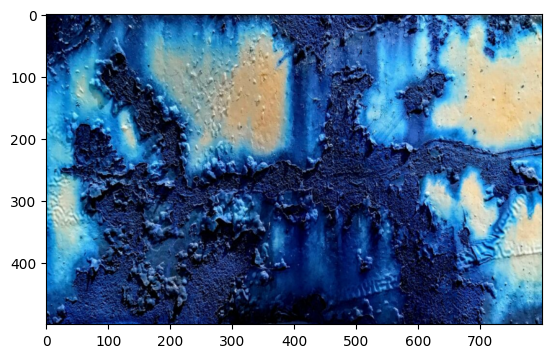

In [125]:
import cv2 as cv
import matplotlib.pyplot as plt
image=cv.imread("Corroded2.jpg")
image=cv.resize(image,(800,500))
plt.imshow(image)

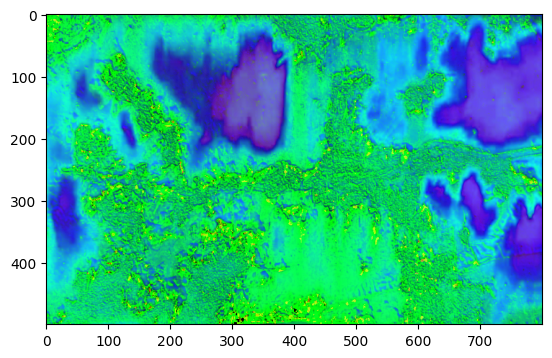

In [126]:
import numpy as np
bl = np.array([0,10, 10], dtype=np.uint8)
bu = np.array([20, 255, 255], dtype=np.uint8)
ol = np.array([15, 100, 100], dtype=np.uint8)
ou = np.array([25, 255, 255], dtype=np.uint8)

hsvimg = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.imshow(hsvimg)

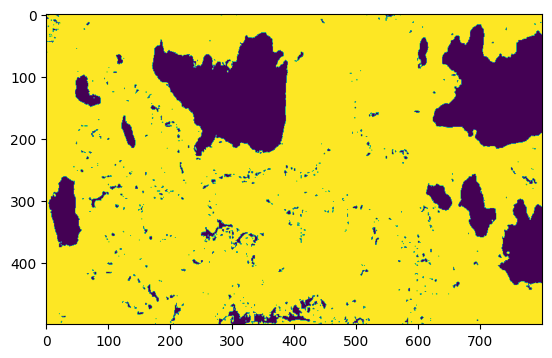

In [127]:
mask1 = cv.inRange(hsvimg, bl, bu)
mask2 = cv.inRange(hsvimg, ol, ou)

maskimg = cv.bitwise_or(mask1,mask2)
masking=cv.dilate(maskimg,(3,3))
plt.imshow(masking)

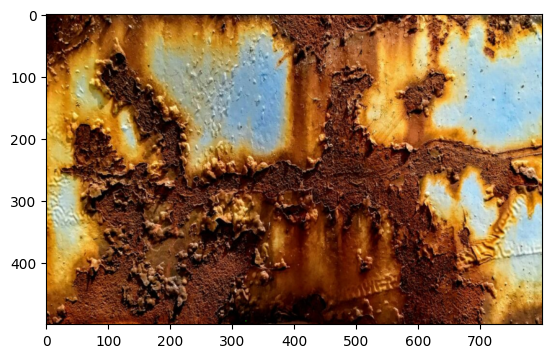

In [128]:
# Find contours in the mask
contours, hierarchy = cv.findContours(masking, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv.drawContours(image, contours, 1, (0, 255, 0), 1)  # Green contours

# Display the original image with contours
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [129]:
Area=[cv.contourArea(cnt) for cnt in contours]

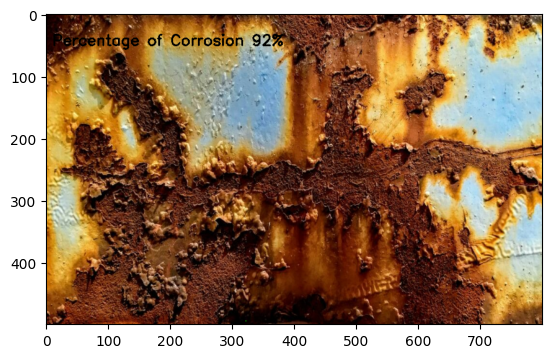

In [130]:
cv.putText(image, "Percentage of Corrosion {}%".format(round((sum(Area)/(800*500))*100),2),(10,50), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
